___
# Projeto 2 - Ciência dos Dados
___

### Integrantes do grupo: 
- Fernanda de Oliveira Pereira, 
- Giovana Cassoni Andrade, 
- Giselle Vieira de Melo, 
- Guilherme dos Santos Martins e 
- Marlon Silva Pereira.



<div id="indice"></div>

## Índice

- [Contextualização](#contextualizacao)
    - [Pergunta](#tema_pergunta)
- [Minerando Dados e Características do Dataset](#dados)
    - [Bibliotecas](#bibliotecas)
    - [Sobre a Base de Dados](#sobre)
    - [Mudanças à base de dados](#mudancas)
    - [Base de Dados](#base_de_dados)
    - [Clean up](#clean)
    - [Análise Descritiva](#analise)
    - [Conclusões da Análise Exploratória](#exploratoria)
        - [Análise dos histogramas](#histogramas)
        - [Análise dos gráficos de dispersão](#dispersao)
- [Modelos de Predição](#modelos)
    - [Regressão Múltipla](#modelo1)
    - [Regression Tree](#modelo2)
    - [Random Forest Regression](#modelo3)
- [Processo e Estatísticas de Validação](#processo)
    - [Regressão Múltipla](#multipla)
    - [Regression Tree](#tree)
    - [Random Forest Regression](#forest)
    - [Análise de homocedasticidade](#homocedasticidade)
- [Validação Cruzada](#validacao)
- [Conclusão](#conclusao)
    - [Interpretações do modelo](#interpretacao)
    - [Melhorias reais para implementações futuras](#melhorias)
- [Referências Bibliográficas](#referencias)

<div id="contextualizacao"></div>

___
### Contextualização 
O coronavírus, que chegou ao Brasil em 2020 e já deixou 160 mil mortes, possui sua vacina desde o começo de 2021, esta que influencia diretamente o número de casos no país. Diante disso, nós, alunos do Insper, tivemos a ideia de realizar uma análise preditiva visando mensurar, a partir de dados de vacinação, mortes e outras variáveis, quantos casos de infecção irão ocorrer em cada dia. Para tanto, nossa base de dados foi retirada do site <em><b>Our World in Data </b></em>, no qual o dataset contém várias informações relativas ao coronavírus no mundo. Fez-se necessário que filtrássemos as variáveis que seriam interessantes para nossa análise, são elas: total de casos, novos casos, total de mortes, novas mortes e total de vacinações, todas no Brasil, as quais explicaremos posteriormente. 

<center> <img src="imagens/covid1.jpg" width=500> <center> 
<center> <em><i> imagem do covid19 disponível em: https://www.infomoney.com.br/minhas-financas/covid-19-o-que-se-sabe-ate-agora-da-variante-omicron/ </i></em> <center>

Dessa forma, esse projeto tem o propósito de prever uma variável principal (Target) em função de demais outras variáveis (Features) que podem influenciar em seu comportamento.

<div id="tema_pergunta"></div>

### Pergunta:

Dado o contexto do projeto, articulamos a seguinte pergunta para realização desse projeto: 


<center> <em><b> " Como prever a situação futura de casos de covid-19 no Brasil, com base em dados da progressão da doença e da vacinação no país?" </b></em> </center>



Logo, através dessa pergunta, pretende-se prever uma informação numérica com o target como um dado quantitativo e, consequentemente, os procedimentos aplicados serão técnicas descritas em Regressão.

<div id="dados"></div>

___
## Minerando Dados e Características do Dataset

<div id="bibliotecas"></div>

### Bibliotecas

O primeiro passo é importar todas as bibliotecas que serão utilizadas ao longo de todo o projeto.

In [26]:
%matplotlib inline
# %matplotlib notebook
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
import seaborn as sns
import statsmodels.api as sm
from scipy.stats import norm, probplot
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

<div id="sobre"></div>

### Sobre a Base de Dados

A base de dados original utilizada para o projeto é um dataset criado pela equipe Our World in Data que é atualizada durante a pandemia do covid-19, desde o seu início, na data de 26/02/2020, até os dias de hoje, com dados colhidos de muitos países.

As informações originais contidas no dataset encontram-se todas explicadas em detalhes aprofundados em [Data on COVID-19 (coronavirus) by Our World in Data](https://github.com/owid/covid-19-data/tree/master/public/data).

Como já mencionado durante a contextualização, as variáveis da base de dados a serem utilizadas são:

- <em><b> new_cases: </b></em> Essa variável é o target do projeto, e ele mostra os novos casos de Covid-19, esses dados são atualizados diariamente.
- <em><b> total_cases: </b></em> Com essa feature vê-se o número total de casos confirmados acumulados no país desde o início da pandemia.
- <em><b> new_deaths: </b></em> Similar ao formato do target, essa feature revela as novas mortes atribuídas ao Covid-19, também sendo atualizados diariamente.
- <em><b> total_deaths: </b></em> Essa feature, com a configuração como a do total de casos, mostra o número total de mortes confirmadas acumuladas no país desde o início da pandemia.
- <em><b> total_vaccinations: </b></em> Esse total de vacinações sinaliza o número total de doses de vacina administradas desde o começo da distribuição da vacina.

<div id="mudancas"></div>

### Mudanças à bade de dados

A base de dados editada para ser usada no projeto contém apenas os dados referentes ao Brasil, uma vez que a pergunta é relativa à esse país. Outra edição é o período de tempo, com os dados indo desde 26/02/2020 até a data em que a base foi baixada, 16/11/2021.

O dataset original não foi baixado para vizualização nesse relatório, uma vez que possui uma gigantesca quantidade de dados e pode deixar o carregamento do código muito devagar, porém se desejar acessar e analisar com maior minudência é só baixar o arquivo "owid-covid-data.xlsx".

<div id="base_de_dados"></div>

### Base de Dados

Em seguida, é armazenado o documento excel com a base dos dados que será usado em "filename" e acessado através da leitura do excel, guardado em "data_base".

In [27]:
# Armazenando o nome do excel com os dados
filename = 'covid-data-brazil.xlsx'

In [28]:
# Acessando a base de dados
data_base = pd.read_excel(filename)
data_base.head(10)

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,BRA,South America,Brazil,2020-02-26,1,1.0,NaN,NaN,NaN,NaN,...,10.1,17.9,NaN,2.2,75.88,0.765,NaN,NaN,NaN,NaN
1,BRA,South America,Brazil,2020-02-27,1,0.0,NaN,NaN,NaN,NaN,...,10.1,17.9,NaN,2.2,75.88,0.765,NaN,NaN,NaN,NaN
2,BRA,South America,Brazil,2020-02-28,1,0.0,NaN,NaN,NaN,NaN,...,10.1,17.9,NaN,2.2,75.88,0.765,NaN,NaN,NaN,NaN
3,BRA,South America,Brazil,2020-02-29,2,1.0,NaN,NaN,NaN,NaN,...,10.1,17.9,NaN,2.2,75.88,0.765,7049.6,3.31,5.25,32.943066
4,BRA,South America,Brazil,2020-03-01,2,0.0,NaN,NaN,NaN,NaN,...,10.1,17.9,NaN,2.2,75.88,0.765,NaN,NaN,NaN,NaN
5,BRA,South America,Brazil,2020-03-02,2,0.0,0.286,NaN,NaN,0.0,...,10.1,17.9,NaN,2.2,75.88,0.765,NaN,NaN,NaN,NaN
6,BRA,South America,Brazil,2020-03-03,2,0.0,0.286,NaN,NaN,0.0,...,10.1,17.9,NaN,2.2,75.88,0.765,NaN,NaN,NaN,NaN
7,BRA,South America,Brazil,2020-03-04,4,2.0,0.429,NaN,NaN,0.0,...,10.1,17.9,NaN,2.2,75.88,0.765,NaN,NaN,NaN,NaN
8,BRA,South America,Brazil,2020-03-05,4,0.0,0.429,NaN,NaN,0.0,...,10.1,17.9,NaN,2.2,75.88,0.765,NaN,NaN,NaN,NaN
9,BRA,South America,Brazil,2020-03-06,13,9.0,1.714,NaN,NaN,0.0,...,10.1,17.9,NaN,2.2,75.88,0.765,NaN,NaN,NaN,NaN


<div id="clean"></div>

### Clean up

Aqui será filtrada a base de dados, fornecendo apenas as colunas que influenciam no nosso target, excluindo as colunas que mostram informações constantes da população e do país, como o número de indivíduos com doenças crônicas e o IDH, e as colunas que não afetam nossa análise.

Dessa forma, como nossa predição se baseia na ocorrência de novos casos a partir do total de vacinações e da progressão da doença no país, optamos por filtrar nossa base de dados com features que traduzirão diretamente a influência da vacina e das mortes sobre os novos casos. 

Com esses apontamentos, na base de dados será utilizada as colunas: "total_cases", "total_deaths", "new_deaths" e "total_vaccinations", além da coluna do target "new_cases".

In [29]:
# Lista das colunas
lista = ['total_cases','new_cases','total_deaths','new_deaths','total_vaccinations']

# Fazendo loc na lista das colunas acima
df = data_base.loc[:, lista]
df

,total_cases,new_cases,total_deaths,new_deaths,total_vaccinations
0,1,1.0,NaN,NaN,NaN
1,1,0.0,NaN,NaN,NaN
2,1,0.0,NaN,NaN,NaN
3,2,1.0,NaN,NaN,NaN
4,2,0.0,NaN,NaN,NaN
...,...,...,...,...,...
625,21939196,14598.0,610491.0,267.0,294219326.0
626,21953838,14642.0,611222.0,731.0,NaN
627,21957967,4129.0,611283.0,61.0,296865258.0
628,21960766,2799.0,611346.0,63.0,NaN


Esse filtro irá excluir as linhas que não possuem números nos dados (NaN), permitindo uma análise sem lacunas.

In [30]:
# Retirando linhas com dados NaN
df = df.dropna()
df

,total_cases,new_cases,total_deaths,new_deaths,total_vaccinations
325,8455059,61567.0,209296.0,1050.0,0.0
326,8488099,33040.0,209847.0,551.0,112.0
327,8511770,23671.0,210299.0,452.0,1109.0
328,8573864,62094.0,211491.0,1192.0,11470.0
329,8638249,64385.0,212831.0,1340.0,28543.0
...,...,...,...,...,...
623,21909298,12273.0,610036.0,280.0,280989164.0
624,21924598,15300.0,610224.0,188.0,282987544.0
625,21939196,14598.0,610491.0,267.0,294219326.0
627,21957967,4129.0,611283.0,61.0,296865258.0


<div id="analise"></div>

### Análise Descritiva

Nessa etapa será feita uma análise descritiva das variáveis para compreender como cada uma das features se comporta juntamente à variável target. Para tanto, foram plotados 5 histogramas, um para cada variável, para se obter intepretações quantitativas referentes à densidade. 

In [31]:
# informações estatísticas da moldura dos dados
df.describe()

,total_cases,new_cases,total_deaths,new_deaths,total_vaccinations
count,2.420000e+02,242.000000,242.000000,242.000000,2.420000e+02
mean,1.607327e+07,46658.590909,436257.380165,1397.140496,9.559905e+07
std,4.419430e+06,26911.279407,138022.762996,948.427743,8.867244e+07
min,8.455059e+06,-573.000000,209296.000000,0.000000,0.000000e+00
25%,1.206815e+07,24654.000000,296237.750000,654.750000,1.438972e+07
50%,1.658502e+07,43274.000000,463995.000000,1212.500000,6.786347e+07
75%,2.032388e+07,70025.750000,568028.000000,2023.250000,1.620077e+08
max,2.196568e+07,115228.000000,611478.000000,4249.000000,2.971040e+08


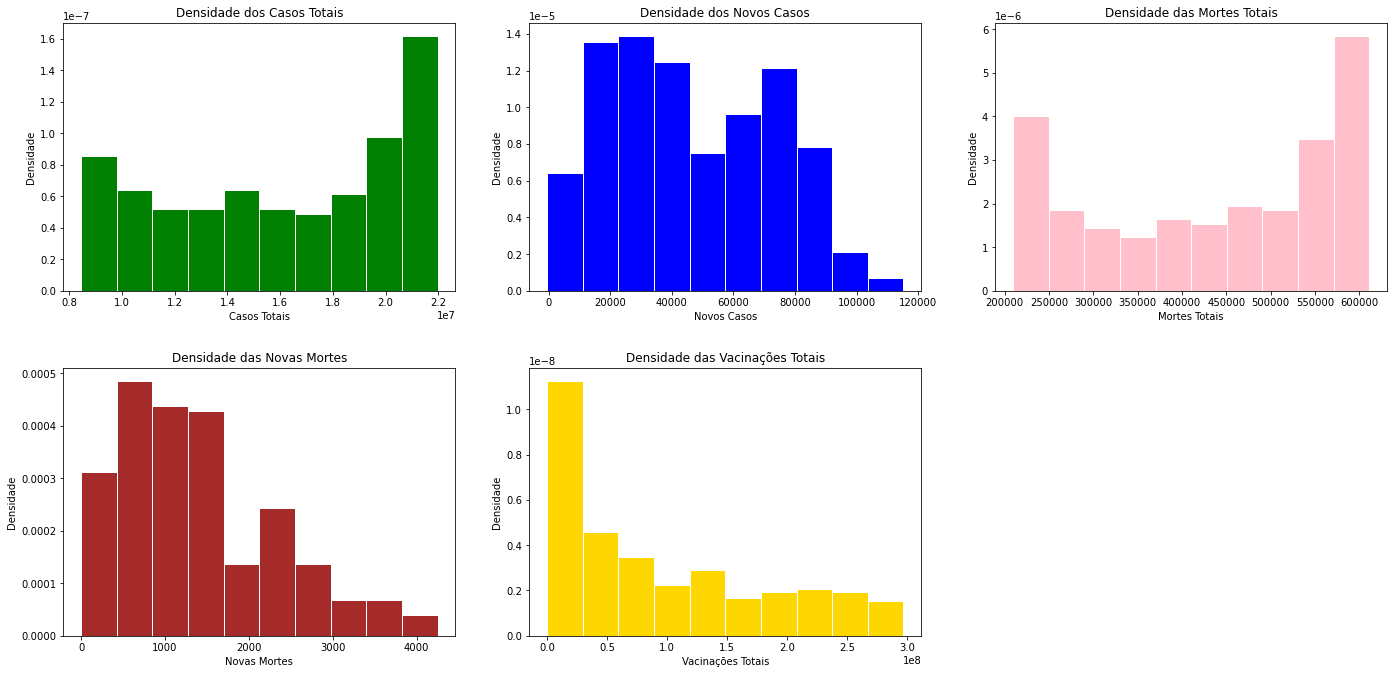

In [32]:
figure = plt.figure(figsize=(20, 10))

# Plotando o gráfico da densidade dos casos totais
plt.subplot(2, 3, 1)
plt.hist(df.total_cases, edgecolor='white', color='green',density=True)
plt.title('Densidade dos Casos Totais')
plt.ylabel('Densidade')
plt.xlabel('Casos Totais')

# Plotando o gráfico da densidade dos novos casos
plt.subplot(2, 3, 2)
plt.hist(df.new_cases, edgecolor='white', color='blue', density=True)
plt.title('Densidade dos Novos Casos')
plt.ylabel('Densidade')
plt.xlabel('Novos Casos')

# Plotando o gráfico da densidade do total de mortes
plt.subplot(2, 3, 3)
plt.hist(df.total_deaths, edgecolor='white', color='pink', density=True)
plt.title('Densidade das Mortes Totais')
plt.ylabel('Densidade')
plt.xlabel('Mortes Totais')

# Plotando o gráfico da densidade das novas mortes
plt.subplot(2, 3, 4)
plt.hist(df.new_deaths, edgecolor='white', color='brown', density=True)
plt.title('Densidade das Novas Mortes')
plt.ylabel('Densidade')
plt.xlabel('Novas Mortes')

# Plotando o gráfico da densidade do total de vacinações
plt.subplot(2, 3, 5)
plt.hist(df.total_vaccinations, edgecolor='white', color='gold', density=True)
plt.title('Densidade das Vacinações Totais')
plt.ylabel('Densidade')
plt.xlabel('Vacinações Totais')

figure.tight_layout(pad=3.0)
plt.show()

Continuando a análise, foram plotados 4 gráficos de dispersão, de cada feature (total de vacinações, total de casos, novas mortes e total de mortes) com a target em questão, ou seja, "novos casos". 

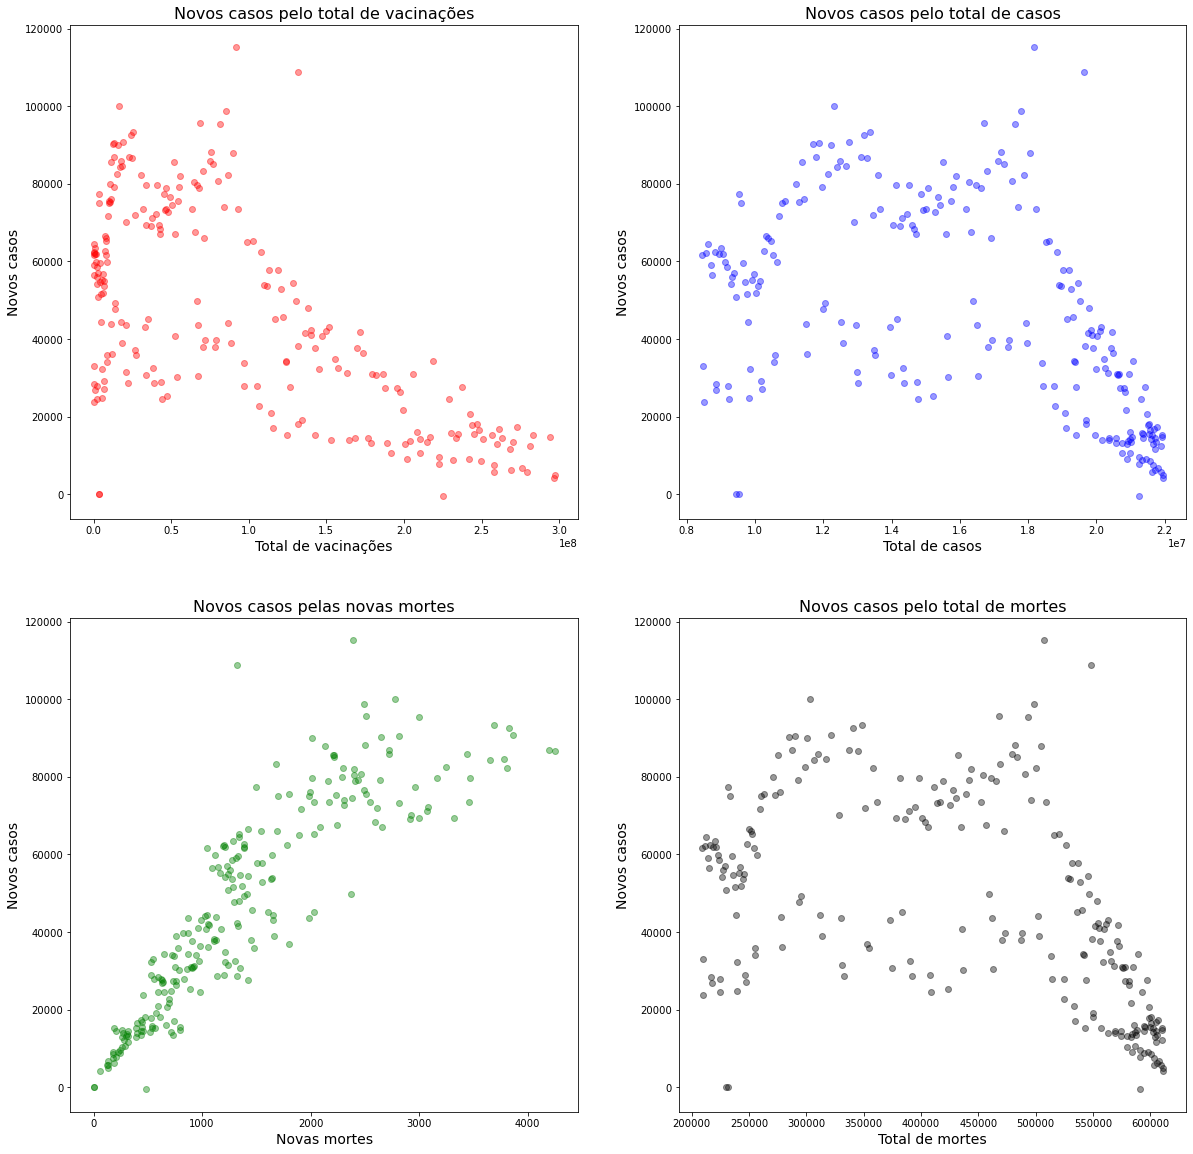

In [33]:
figure = plt.figure(figsize=(20, 20))

# Plotando o gráfico dos novos casos pelo total de vacinações
plt.subplot(2, 2, 1)
plt.scatter(df.total_vaccinations, df.new_cases, c='red', alpha=0.4)
plt.title('Novos casos pelo total de vacinações', fontsize=16)
plt.xlabel('Total de vacinações', fontsize=14)
plt.ylabel('Novos casos', fontsize=14)

# Plotando o gráfico dos novos casos pelo total de casos
plt.subplot(2, 2, 2)
plt.scatter(df.total_cases, df.new_cases, c='blue', alpha=0.4)
plt.title('Novos casos pelo total de casos', fontsize=16)
plt.xlabel('Total de casos', fontsize=14)
plt.ylabel('Novos casos', fontsize=14)

# Plotando o gráfico dos novos casos pelas novas mortes
plt.subplot(2, 2, 3)
plt.scatter(df.new_deaths, df.new_cases, c='green', alpha=0.4)
plt.title('Novos casos pelas novas mortes', fontsize=16)
plt.xlabel('Novas mortes', fontsize=14)
plt.ylabel('Novos casos', fontsize=14)

# Plotando o gráfico dos novos casos pelo total de mortes
plt.subplot(2, 2, 4)
plt.scatter(df.total_deaths, df.new_cases, c='black', alpha=0.4)
plt.title('Novos casos pelo total de mortes', fontsize=16)
plt.xlabel('Total de mortes', fontsize=14)
plt.ylabel('Novos casos', fontsize=14)
plt.show()


<div id="exploratoria"></div>

### Conclusões da análise exploratória:

<div id="histogramas"></div>

#### Análise dos histogramas:

- <em><b> Casos totais: </b></em> É percebido, no maior período analisado do gráfico, uma certa homogeneidade no valor da densidade, por volta de 0.6 de 10.000.000 até 19.000.000 de casos totais. Entretanto, ao início e ao fim do gráfico, há densidades bem maiores, principalmente ao fim, com 22.000.000 de casos totais em uma densidade de 1.6.
- <em><b> Novos casos: </b></em> É percebido uma maior densidade dos valores de novos casos de 20.000 à 40.000, com densidade em pico, por volta de 1.3 e em 70.000 à 90.000, com densidade por volta de 1.0 e 1.2, possivelmente decorrente aos valores de maior freuência desses casos.
- <em><b> Mortes totais: </b></em> É percebido uma densidade aproximadamente constante, com aproximadamente 1.7 de 250.000 à 500.000 de mortes. Ademais, há uma maior densidade em 600.000 mortes, seguido de 240.000  e de 550.000 mortes, com densidade de 6.0, 4.0 e 3.5, respectivamente. 
- <em><b> Novas Mortes: </b></em> 
- <em><b> Vacinações totais: </b></em>

<div id="dispersao"></div>

#### Análise dos gráficos de dispersão:

- <em><b> Vacinações totais: </b></em> Quando é analisado o total de vacinações por novos casos, percebe-se que com o crescimento de vacinações do Brasil, ocorre uma redução de novos casos, indicando uma efetividade da vacina.
- <em><b> Casos totais: </b></em> Quando analisamos total de vacinações por casos totais, percebe-se que no começo não há uma relação tão evidente entre os eixos; porém, em dados mais recentes, indica-se uma redução do número de novos casos, com o aumento de cassos totais. 
- <em><b> Novas mortes: </b></em> Quando analisamos as novas mortes por casos totais, percebe-se que há um aumento do número de mortes, com o aumento de casos totais. 
- <em><b> Mortes totais: </b></em> Por fim, percebe-se que, assim como em casos totais, no começo não há uma relação tão evidente entre os eixos; porém, em dados mais recentes, indica-se uma redução do número de novos casos, com o aumento de mortes totais. 

<div id="modelos"></div>

___
## Modelos de Predição

Os 3 modelos escolhidos foram a "Regressão Múltipla", "Regression Tree" e "Random Forest Regression".

<div id="modelo1"></div>

### Regressão Múltipla

Primeiramente,o modelo de Regressão Múltipla foi escolhido por ser um modelo consideravelmente simples de ser configurado em relação a outros modelos existentes, analisando a relação entre as variáveis Features com a variável resposta Target, encontrando coeficientes que determinam uma reta. Através dela, podemos prever o valor da variável Target, possuindo apenas as variáveis Features. 

<center> <img src="imagens/multiple_regression.png" width=500> </center> 
<center> <em><i> Imagem de uma "Multiple Regression" disponível em: https://www.mathworks.com/help/stats/regress.html </i></em> </center>

<div id="modelo2"></div>

### Regression Tree

O modelo Regression Tree é um classificador em formato de "Árvore" com três tipos de nós, o nó raiz que representa toda a amostra, os nós internos, oriundos do nó raiz, que representam os recursos do conjunto de dados, e suas ramificações representam as regras de decisão, por fim os nós Folha representam o resultado, ou seja, sua tomada de decisão.

<center> <img src="imagens/regression_tree.png" width=500> </center> 
<center> <em><i> Imagem de uma "Regression Tree" disponível em: https://towardsdatascience.com/machine-learning-basics-decision-tree-regression-1d73ea003fda </i></em> </center>

Esse algoritmo foi escolhido dada a sua facilidade de entender, não ser necessário realizar uma grande limpeza de dados e além de que seu desempenho não é afetado pela falta de linearidade. No entanto, apesar de a necessidade de ajustar hiperparâmetros ser quase nula, pode haver um problema de over-fitting.

<div id="modelo3"></div>

### Random Forest Regression

O problema de over-fitting mencionado no modelo anterior pode ser resolvido pelo algoritmo Random Forest Regression. Esse é, portanto, o motivo de termos o escolhido como o próximo modelo aplicado.

<center> <img src="imagens/random_forest.png" width=500> </center> 
<center> <em><i> Imagem de uma "Random Forest Regression" disponível em: https://levelup.gitconnected.com/random-forest-regression-209c0f354c84 </i></em> </center>

O Random Forest Regression utiliza o método Ensemble Learning para realizar uma regressão. Essa técnica combina a previsão de vários algoritmos de Regression Tree, tendo uma previsão mais precisa do que apenas um único modelo. Dessa forma, uma Random Forest contrói várias árvores de decisão, onde uma não influencia na outra, e produz a média das classes como a previsão de uma das árvores. O over-fitting, portanto, se reduz justamente por essa mescla da saída de várias árvores de decisão para gera a saída final.

<div id="processo"></div>

___
## Processo e Estatísticas de Validação

Após ter sido feita a explicação de como cada modelo funciona e qual o motivo de eles terem sido escolhidos, os modelos serão desenvolvidos para realizar os cálculos necessários que indicarão a performance de modelo preditivo.

Primeiramente, a base de dados é separada em duas partes, a de teste e a de treinamento. A parte de treinamento será usada para calibrar o modelo e a parte de teste para estimar os modelos preditivos.

In [34]:
# Dividindo os dados em train e test
X = df[['total_vaccinations', 'new_deaths', 'total_deaths','total_cases']]
Y = df['new_cases']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 1)

<div id="multipla"></div>

### Regressão Múltipla

Função que aplica o modelo de Regressão Múltipla para os valores recebidos de entrada pela base de dados:

In [35]:
# Função para fazer a regressão com constante adicionada
def Regressão(X, Y):
    X_cp = sm.add_constant(X)
    model = sm.OLS(Y,X_cp)
    results = model.fit()
    return results

Primeira aplicação da Regressão com os valores de X_train e Y_train:

In [36]:
results = Regressão(X_train, Y_train)
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              new_cases   R-squared:                       0.811
Model:                            OLS   Adj. R-squared:                  0.807
Method:                 Least Squares   F-statistic:                     201.2
Date:                Tue, 30 Nov 2021   Prob (F-statistic):           9.11e-67
Time:                        12:02:09   Log-Likelihood:                -2083.8
No. Observations:                 193   AIC:                             4178.
Df Residuals:                     188   BIC:                             4194.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               3.678e+04   1.27e+04      2.907      0.004    1.18e+04    6.17e+04
total_vaccinations -5.224e-05   3.57e-05     -1.464      0.145      -0.000    1.81e-05
new_deaths            21.7887      1.202     18.124      0.000      19.417      24.160
total_deaths           0.1967      0.127      1.551      0.123      -0.054       0.447
total_cases           -0.0063      0.004     -1.471      0.143      -0.015       0.002
==============================================================================
Omnibus:                       58.438   Durbin-Watson:                   2.174
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              243.529
Skew:                           1.105   Prob(JB):                     1.31e-53
Kurtosis:                       8.040   Cond. No.                     1.91e+09
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.91e+09. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Segunda aplicação da Regressão com os valores totais de vacinações, novas mortes e total de mortes:

In [37]:
X1 = X_train[['total_vaccinations', 'new_deaths', 'total_deaths']]
results1 = Regressão(X1,Y_train)
results1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              new_cases   R-squared:                       0.808
Model:                            OLS   Adj. R-squared:                  0.805
Method:                 Least Squares   F-statistic:                     265.9
Date:                Tue, 30 Nov 2021   Prob (F-statistic):           1.50e-67
Time:                        12:02:09   Log-Likelihood:                -2084.9
No. Observations:                 193   AIC:                             4178.
Df Residuals:                     189   BIC:                             4191.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               1.951e+04   4741.992      4.115      0.000    1.02e+04    2.89e+04
total_vaccinations -8.399e-05   2.85e-05     -2.948      0.004      -0.000   -2.78e-05
new_deaths            21.3422      1.167     18.291      0.000      19.041      23.644
total_deaths           0.0116      0.016      0.718      0.474      -0.020       0.044
==============================================================================
Omnibus:                       55.833   Durbin-Watson:                   2.162
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              217.973
Skew:                           1.073   Prob(JB):                     4.65e-48
Kurtosis:                       7.744   Cond. No.                     7.08e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.08e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Terceira aplicação da Regressão com os valores totais de vacinações e as novas mortes:

In [38]:
X2 = X_train[['total_vaccinations', 'new_deaths']]
results2 = Regressão(X2,Y_train)
results2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              new_cases   R-squared:                       0.808
Model:                            OLS   Adj. R-squared:                  0.806
Method:                 Least Squares   F-statistic:                     399.6
Date:                Tue, 30 Nov 2021   Prob (F-statistic):           8.59e-69
Time:                        12:02:09   Log-Likelihood:                -2085.2
No. Observations:                 193   AIC:                             4176.
Df Residuals:                     190   BIC:                             4186.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                2.24e+04   2505.624      8.942      0.000    1.75e+04    2.73e+04
total_vaccinations -6.545e-05    1.2e-05     -5.434      0.000   -8.92e-05   -4.17e-05
new_deaths            21.6610      1.078     20.099      0.000      19.535      23.787
==============================================================================
Omnibus:                       57.896   Durbin-Watson:                   2.166
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              238.234
Skew:                           1.098   Prob(JB):                     1.85e-52
Kurtosis:                       7.980   Cond. No.                     3.74e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.74e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Cálculo dos coeficientes que determinarão a reta de Regressão a partir do modelo e as Features que forão selecionadas:

In [39]:
# Acessando os parâmetros calculados
beta0_hat = results2.params[0]  # const
beta1_hat = results2.params[1]  # total_vaccinations
beta2_hat = results2.params[2]  # new_deaths

Função da reta que calcula os valores de previsão da variável Target:

In [40]:
# Definindo a função que se aplica aos parâmetros
def f(feature1, feature2):
    return beta0_hat + beta1_hat*feature1 + beta2_hat*feature2

Plotagem do gráfico 3D que mostra a relação entre as duas variáveis Features e a previsão da variável Target:

In [41]:
# Gera 100 pontos entre os menores e maiores valores de cada feature
npoints = 100
feature1 = X_test["total_vaccinations"]
feature2 = X_test["new_deaths"]
x_vc = np.linspace(feature1.min(), feature1.max(), npoints)
y_vc = np.linspace(feature2.min(), feature2.max(), npoints)

In [42]:
# Construindo a grade de 100x100 pontos
eixo_x, eixo_y = np.meshgrid(x_vc, y_vc)

In [43]:
# Aplicando a função em cada ponto e construindo um plano
fit_z = f(eixo_x, eixo_y)

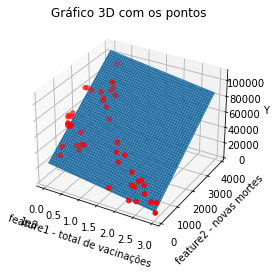

In [44]:
# Plotando o plano em 3D com os pontos
plt3d = plt.figure().gca(projection="3d")
plt3d.plot_surface(eixo_x, eixo_y, fit_z)
plt3d.scatter(feature1, feature2, Y_test, color="r")
plt3d.set_title("Gráfico 3D com os pontos")
plt3d.set_xlabel("feature1 - total de vacinações")
plt3d.set_ylabel("feature2 - novas mortes")
plt3d.set_zlabel("Y")
plt.show()

Cálculo dos valores previstos para a base de teste e plotagem do gráfico que mostra a relação entre os valores previstos e os valores reais:

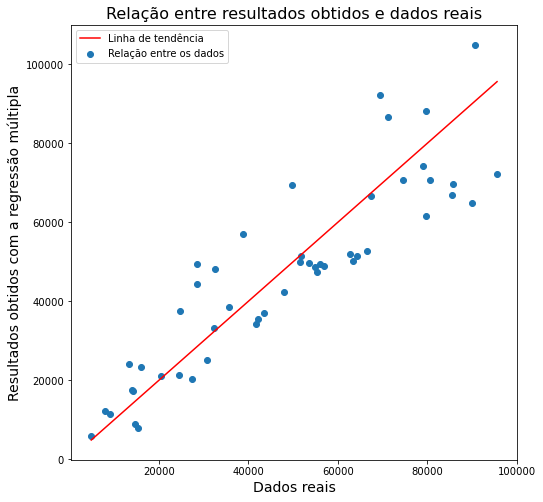

In [45]:
y_pred_m = []
p_1 = X_test.total_vaccinations.to_list()
p_2 = X_test.new_deaths.to_list()
for i in range(len(p_1)):
    y_pred_m.append(f(p_1[i], p_2[i]))

plt.figure(figsize = (8,8))
x_reta = [min(Y_test), max(Y_test)]
plt.scatter(Y_test, y_pred_m, label = 'Relação entre os dados')
plt.plot(x_reta, x_reta, color = 'r', label = 'Linha de tendência')
plt.title("Relação entre resultados obtidos e dados reais", fontsize=16)
plt.xlabel("Dados reais", fontsize=14)
plt.ylabel("Resultados obtidos com a regressão múltipla", fontsize=14)
plt.legend()
plt.show()

De acordo com os resultados desse gráfico é possível analisar que a modelagem realizada condiz quase fielmente com a realidade dos dados.

Gráfico de normalidade de resíduos:

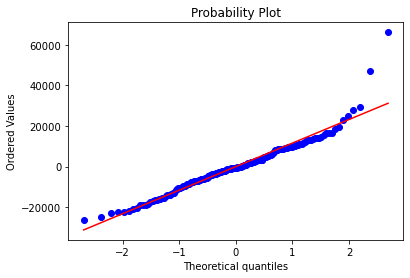

In [46]:
# Plotando o gráfico de resíduos
plt.figure()
probplot(results2.resid, dist = 'norm', plot = plt);

Analisando o gráfico, é possível ver que os resíduos gerados pelo modelo possuem uma distribuição que se aproxima da normal, assim como era esperado.

<div id="tree"></div>

### Regression Tree

Aplicação da Regression Tree para a base de treinamento e plotagem dos resultados para a base de teste:

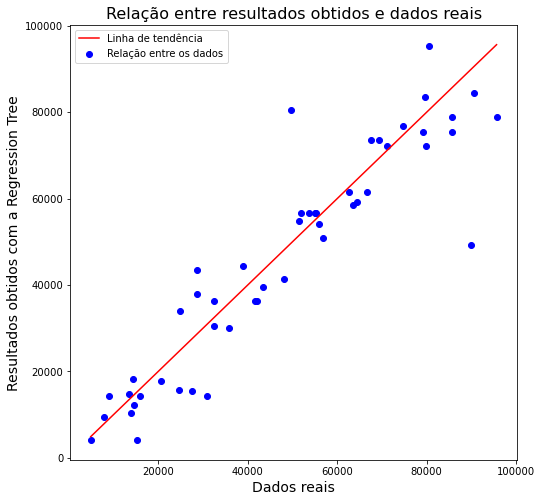

In [47]:
# Aplicando a função obtida através da biblioteca
regressor_t = DecisionTreeRegressor()
regressor_t.fit(X_train, Y_train)

# Prevendo um novo resultado
y_pred_t = regressor_t.predict(X_test)

# Visualisando a Regression Tree
plt.figure(figsize = (8,8))
plt.scatter(Y_test, y_pred_t, color = 'blue', label = 'Relação entre os dados')
plt.plot(x_reta, x_reta, color = 'r', label = 'Linha de tendência')
plt.title("Relação entre resultados obtidos e dados reais", fontsize=16)
plt.xlabel("Dados reais", fontsize=14)
plt.ylabel("Resultados obtidos com a Regression Tree", fontsize=14)
plt.legend()
plt.show()

O método de regressão retratado nesse gráfico aparenta ser válido para predição do nosso modelo.

<div id="forest"></div>

### Random Forest Regression

Aplicação da Random Forest Regression para a base de treinamento e plotagem dos resultados para a base de teste:

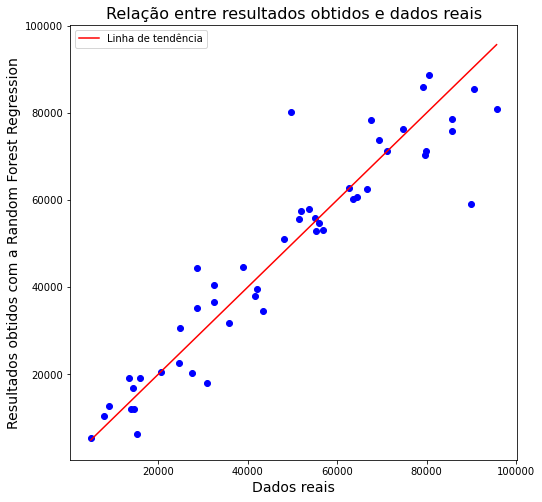

In [48]:
# Aplicando a função obtida através da biblioteca
regressor_f = RandomForestRegressor(n_estimators = 100)
regressor_f.fit(X_train, Y_train)

# Prevendo um novo resultado
y_pred_f = regressor_f.predict(X_test)

# Visualisando a Random Forest Regression
plt.figure(figsize = (8,8))
plt.scatter(Y_test, y_pred_f, color = 'blue')
plt.plot(x_reta, x_reta, color = 'r', label = 'Linha de tendência')
plt.title("Relação entre resultados obtidos e dados reais", fontsize=16)
plt.xlabel("Dados reais", fontsize=14)
plt.ylabel("Resultados obtidos com a Random Forest Regression", fontsize=14)
plt.legend()
plt.show()

O método de regressão retratado nesse gráfico aparenta ser válido para predição do nosso modelo.

<div id="homocedasticidade"></div>

### Análise de homocedasticidade

Em seguida será realizado o cálculo dos valores previstos para a base de teste e a plotagem dos gráficos de análise de homocedasticidade, que mostram a dispersão dos resíduos em função da variável independente.

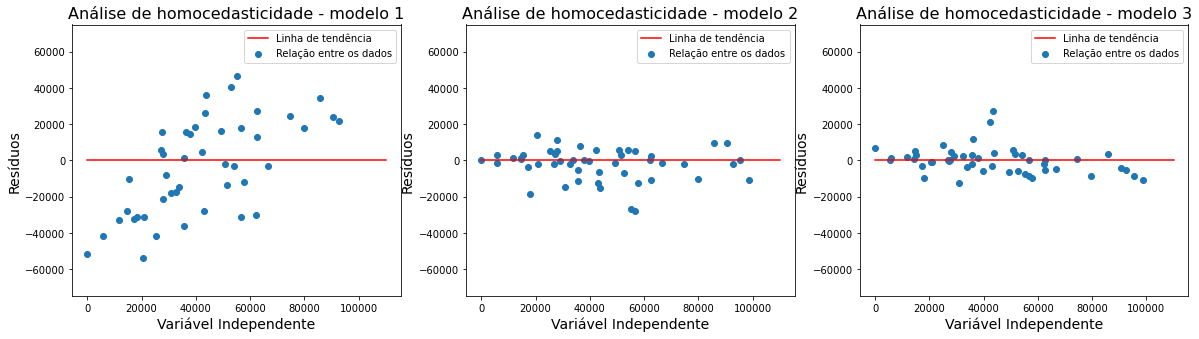

In [54]:
# Resíduos do modelo Regressão Múltipla
residuos_m = []
Y_test_list = Y_test.to_list()
for i in range(len(Y_test)):
    r = Y_test_list[i] - y_pred_m[i]
    residuos_m.append(r)

# Resíduos do modelo Regression Tree
residuos_t = []
for i in range(len(y_pred_t)):
    r = y_pred_t[i] - Y_test_list[i]
    residuos_t.append(r)

# Resíduos do modelo Random Forest Tree
residuos_f = []
for i in range(len(y_pred_f)):
    r = y_pred_f[i] - Y_test_list[i]
    residuos_f.append(r)

# Parâmetros para a linha de tendência
x_reta = [0, 110000]
y_reta = [0, 0]

# Plotando os três gráficos de análise de homocedasticidade
plt.figure(figsize = (20, 5))

plt.subplot(1, 3, 1)
plt.scatter(Y_test_list, residuos_m, label = 'Relação entre os dados')
plt.plot(x_reta, y_reta, color = 'r', label = 'Linha de tendência')
plt.title("Análise de homocedasticidade - modelo 1", fontsize=16)
plt.xlabel("Variável Independente", fontsize=14)
plt.ylabel("Resíduos", fontsize=14)
plt.ylim([-75000,75000])
plt.legend()

plt.subplot(1, 3, 2)
plt.scatter(Y_test_list, residuos_t, label = 'Relação entre os dados')
plt.plot(x_reta, y_reta, color = 'r', label = 'Linha de tendência')
plt.title("Análise de homocedasticidade - modelo 2", fontsize=16)
plt.xlabel("Variável Independente", fontsize=14)
plt.ylabel("Resíduos", fontsize=14)
plt.ylim([-75000,75000])
plt.legend()

plt.subplot(1, 3, 3)
plt.scatter(Y_test_list, residuos_f, label = 'Relação entre os dados')
plt.plot(x_reta, y_reta, color = 'r', label = 'Linha de tendência')
plt.title("Análise de homocedasticidade - modelo 3", fontsize=16)
plt.xlabel("Variável Independente", fontsize=14)
plt.ylabel("Resíduos", fontsize=14)
plt.ylim([-75000,75000])
plt.legend()
plt.show()

Analisando os gráficos homocedasticidade é possível notar que o modelo de regressão múltipla apresenta uma margem de erro maior para seus resíduos quando comparado com os outros modelos.

- <em><b>  Regressão Múltipla: </b></em> Não Indepedência
- <em><b>  Regression Tree: </b></em> Ideal
- <em><b>  Random Forest Regression: </b></em> Ideal

<div id="validacao"></div>

___
## Validação Cruzada

Processo de Validação Cruzada utilizando 10 ciclos, ou seja, "rodando" o código 10 vezes usando diferentes bases de teste e treinamento, e cálculos da performance média e desvio padrão das duas medidas R2 e RMS para cada um dos modelos aplicados para a base de teste:

A Validação Cruzada é utilizada para identificar o melhor método de predição a ser escolhido para a base de dados do projeto, visto que compara diversas vezes a eficiência de cada um dos três modelos a partir de dados diferentes a cada vez.

In [50]:
# Criando as listas que armazenarão os dados de R2 e RMS
valores_r2_m = []
valores_rms_m = []
valores_r2_t = []
valores_rms_t = []
valores_r2_f = []
valores_rms_f = []

for i in range(10):
    # Gera lista de treino e teste, que será renovada a cada ciclo
    X_train1, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = i)
    X3 = X_train1[['total_vaccinations', 'new_deaths']]
    Y_test_list = Y_test.to_list()
    
    # Regressão Múltipla
    results3 = Regressão(X3,Y_train)
    beta0_hat = results3.params[0]  # const
    beta1_hat = results3.params[1]  # total_vaccinations
    beta2_hat = results3.params[2]  # new_deaths
    y_pred_m1 = []
    p_1 = X_test.total_vaccinations.to_list()
    p_2 = X_test.new_deaths.to_list()
    for i in range(len(p_1)):
        y_pred_m1.append(beta0_hat + beta1_hat*p_1[i] + beta2_hat*p_2[i])
    e_m = mean_squared_error(Y_test_list, y_pred_m1, squared=False)
    valores_rms_m.append(e_m)
    r2_m = r2_score(Y_test_list, y_pred_m1)
    valores_r2_m.append(r2_m)
    
    # Regression Tree
    regressor_t = DecisionTreeRegressor()
    regressor_t.fit(X_train1, Y_train)

    # Prevendo um novo resultado
    y_pred_t = regressor_t.predict(X_test)
    e_t = mean_squared_error(Y_test_list, y_pred_t, squared=False)
    valores_rms_t.append(e_t)
    r2_t = r2_score(Y_test_list, y_pred_t)
    valores_r2_t.append(r2_t)

    # Random Regression Forest
    regressor_f = RandomForestRegressor(n_estimators = 100)
    regressor_f.fit(X_train1, Y_train)

    # Prevendo um novo resultado
    y_pred_f = regressor_f.predict(X_test)
    e_f = mean_squared_error(Y_test_list, y_pred_f, squared=False)
    valores_rms_f.append(e_f)
    r2_f = r2_score(Y_test_list, y_pred_f)
    valores_r2_f.append(r2_f)

# Criando a tebela com os valores de R2 e de RMS para os três modelos
R2_list_mean = [np.mean(valores_r2_m), np.mean(valores_r2_t), np.mean(valores_r2_f)]
R2_list_std = [np.std(valores_r2_m), np.std(valores_r2_t), np.std(valores_r2_f)]
RMS_list_mean = [np.mean(valores_rms_m), np.mean(valores_rms_t), np.mean(valores_rms_f)]
RMS_list_std = [np.std(valores_rms_m), np.std(valores_rms_t), np.std(valores_rms_f)]
df_vc = pd.DataFrame(R2_list_mean)
df_vc.columns = ['Média de R2']
df_vc.index = ['Multiple regression', 'Regression Tree', 'Forest Regression']
df_vc['Desvio Padrão de R2'] = R2_list_std
df_vc['Média de RMS'] = RMS_list_mean
df_vc['Desvio Padrão de RMS'] = RMS_list_std
df_vc

,Média de R2,Desvio Padrão de R2,Média de RMS,Desvio Padrão de RMS
Multiple regression,0.782096,0.047123,12455.160571,1451.930597
Regression Tree,0.827889,0.058350,10906.701234,1876.846219
Forest Regression,0.873472,0.041773,9414.843051,1524.742522


<div id="conclusao"></div>

___
## Conclusão

Diante dos resultados apresentados, pode-se interpretar que o modelo de Random Forest Regression mostrou-se ser o mais indicado para ajudar a responder a pergunta proposta pelo grupo, pois apresenta uma maior média de R2 e menor média de RMS para o processo de validação cruzada, entre os modelos utilizados no projeto,indicando uma melhor acurácia em relação aos demais métodos.

<div id="interpretacao"></div>

### Interpretações do modelo:

A partir dos modelos preditivos aplicados, percebe-se que o modelo "Forest Regression" teve um resultado mais satisfatório se comparado aos outros, tendo em vista que a média de R2 (<em><b>Coeficiente de determinação</em></b>) está mais próxima de 1, ou seja, seus valores estão mais próximos da base de dados real, observe a fórmula do R2 a seguir:

$$R^2 = 1 - \frac{SS_{RES}}{SS_{TOT}}=1 - \frac{\sum_{i}^n(y_i-\hat{y})^2}{\sum_{i=1}^n(y_i-\bar{y})^2}$$

Pela fórmula, tem-se que a soma presente no numerador é o somatório do quadrado da diferença entre o valor real e o valor estimado de y e no denominador é o somatório do quadrado da diferença entre y real e sua média.


Além de que o valor do RMS (<em><b>Root Mean Squared</em></b>) está menor, indicando que a média de seus erros, se comparadda aos outros modelos preditivos está menor, indicando uma maior compatibilidade com a realidade, observe a fórmula do RMS a seguir:

$$RMS = {\sqrt{\frac{1}{n} \sum_{i=1}^n(y_i-\hat{y_i})^2}} $$
Pela fórmula, tem-se que o RMS é dado pela raiz da média dos quadrados do erro de cada valor.

<div id="melhorias"></div>

### Melhorias reais para implementações futuras:

Uma melhoria a ser adicionada em futuras implementações é aumentar a base de dados, visto que a utilizada tem os dados atuais, que podem muito bem mudar conforme o tempo passe e mais pesquisas sejam feitas. Outra forma de melhorar nosso projeto é comparar os resultados obtidos com outros métodos de regressão, mais avançados ou não, para avaliar se existe alguma opção melhor do que as já utilizadas.

<div id="referencias"></div>

___
## Referências Bibliográficas

- [Our World in Data](https://ourworldindata.org/covid-deaths)

- [Data on COVID-19 (coronavirus) by Our World in Data](https://github.com/owid/covid-19-data/tree/master/public/data).